# Breast Cancer Prediction Project

## Problem Statement

Breast cancer is one of the most common cancers among women worldwide. Early detection significantly increases treatment success rates and patient survival. However, manual classification of breast masses through visual examination of cell samples is time-consuming and can be subject to human error.

This project aims to use machine learning to assist in the accurate diagnosis of breast cancer using the Wisconsin Diagnostic Breast Cancer (WDBC) dataset.

## About the dataset

This project uses the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, which contains features computed from digitized images of fine needle aspirates (FNAs) of breast masses.  The dataset is available from the UCI Machine Learning Repository and can be downloaded [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Environment Setup Cell

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import webbrowser
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

sys.path.append('..')

from IPython.display import Image, display, HTML
from src.data_preprocessing import load_dataset, explore_dataset, preprocess_data, visualize_data, save_processed_dataset
from src.model_training import (
    train_models, evaluate_model, visualize_results, save_best_model, feature_importance,
    implement_ensemble_methods, perform_cross_validation
)
from src.visualization import create_interactive_visualizations, plot_roc_curves_with_ci
from src.logger import setup_logger

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
logger = setup_logger('notebook')

print("Environment setup completed.")
logger.info("Starting breast cancer analysis.")

2025-07-05 23:20:02,620 - breast-cancer-prediction.notebook - Starting breast cancer analysis.


Environment setup completed.


## Data Loading & Exploration

Let's load the Wisconsin Breast Cancer dataset and explore its basic characteristics.

In [2]:
data_path = '../data/raw/wdbc.data'
df = load_dataset(data_path)

print("First 5 rows of the dataset:")
df.head()

2025-07-05 23:20:02,626 - breast-cancer-prediction.data-preprocessing - Data loaded successfully with shape: (569, 32)
2025-07-05 23:20:02,627 - breast-cancer-prediction.data-preprocessing - Validating dataset structure and features.
2025-07-05 23:20:02,627 - breast-cancer-prediction.data-preprocessing - Dataset validation passed successfully.
2025-07-05 23:20:02,639 - breast-cancer-prediction.data-preprocessing - Created dataset version c52295e7da saved to ../data/versions/raw_data_vc52295e7da.json
2025-07-05 23:20:02,639 - breast-cancer-prediction.data-preprocessing - Raw dataset versioned with ID: c52295e7da


First 5 rows of the dataset:


,id,diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
explore_dataset(df)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   radius_se                569 non-null    float64
 4   radius_worst             569 non-null    float64
 5   texture_mean             569 non-null    float64
 6   texture_se               569 non-null    float64
 7   texture_worst            569 non-null    float64
 8   perimeter_mean           569 non-null    float64
 9   perimeter_se             569 non-null    float64
 10  perimeter_worst          569 non-null    float64
 11  area_mean                569 non-null    float64
 12  area_se                  569 non-null    float64
 13  area_worst               569 non-null    float64
 14  smooth

## Feature Descriptions

The dataset contains features computed from digitized images of breast mass FNAs:

- **ID**: Patient identifier
- **Diagnosis**: M = malignant, B = benign (converted to 1 and 0)
- **Ten real-valued features** measured as mean, standard error, and "worst" (mean of the three largest values)

These features include radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

## Data Visualization

Standard visualizations with explanatory captions are created to help understand the dataset.

In [4]:
visualize_data(df)

2025-07-05 23:20:02,667 - breast-cancer-prediction.visualization - Creating standard visualizations.
2025-07-05 23:20:03,511 - breast-cancer-prediction.visualization - Creating interactive visualizations with Plotly.
2025-07-05 23:20:03,663 - breast-cancer-prediction.visualization - Interactive visualizations created and saved to HTML files.
2025-07-05 23:20:03,663 - breast-cancer-prediction.visualization - Standard visualizations created and saved.
2025-07-05 23:20:03,664 - breast-cancer-prediction.visualization - Creating feature distribution by class visualizations.
2025-07-05 23:20:04,953 - breast-cancer-prediction.visualization - Feature distribution visualizations created and saved.


## Interactive Visualizations

Interactive visualizations provide a more engaging way to explore the data. These can be manipulated to view different angles and details.

In [5]:
output_dir = '../reports/figures'
os.makedirs(output_dir, exist_ok=True)

interactive_files = create_interactive_visualizations(df, [col for col in df.columns if col not in ['id', 'diagnosis']], 'diagnosis', output_dir)

2025-07-05 23:20:04,957 - breast-cancer-prediction.visualization - Creating interactive visualizations with Plotly.
2025-07-05 23:20:05,033 - breast-cancer-prediction.visualization - Interactive visualizations created and saved to HTML files.


In [6]:
def open_interactive_visualizations(output_dir='../reports/figures'):
    html_files = [
        'interactive_distributions.html',
        'interactive_scatter_matrix.html',
        'interactive_3d_scatter.html'
    ]
    
    for html_file in html_files:
        file_path = os.path.join(output_dir, html_file)
        if os.path.exists(file_path):
            webbrowser.open('file://' + os.path.abspath(file_path))
            print(f"Opened {html_file} in browser")

display(HTML('''
<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h3>Interactive Visualizations</h3>
    <p>Click the buttons below to open interactive visualizations in your browser:</p>
    <button onclick="
        var kernel = IPython.notebook.kernel;
        kernel.execute('open_interactive_visualizations()');"
        style="background-color: #4CAF50; color: white; padding: 8px 16px; border: none; border-radius: 4px; cursor: pointer;">
        Open All Interactive Visualizations
    </button>
</div>
'''))

## Data Preprocessing

In [7]:
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

print(f"Preprocessing complete. Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

2025-07-05 23:20:05,041 - breast-cancer-prediction.data-preprocessing - Handling missing data.
2025-07-05 23:20:05,042 - breast-cancer-prediction.data-preprocessing - No missing values found in the dataset.


Training set shape: (455, 30), Testing set shape: (114, 30)
Feature scaling applied.

Preprocessing complete. Training set shape: (455, 30), Test set shape: (114, 30)


## Save Preprocessed Data

In [8]:
save_processed_dataset(X_train, X_test, y_train, y_test, scaler)

2025-07-05 23:20:05,066 - breast-cancer-prediction.data-preprocessing - Created dataset version 7c4395a74c saved to ../data/versions/processed_train_data_v7c4395a74c.json
2025-07-05 23:20:05,066 - breast-cancer-prediction.data-preprocessing - Processed training dataset versioned with ID: 7c4395a74c
2025-07-05 23:20:05,067 - breast-cancer-prediction.data-preprocessing - Preprocessed data saved in '../data/processed' directory.


## Model Training

In [9]:
trained_models = train_models(X_train, y_train)
print(f"Successfully trained {len(trained_models)} models")

2025-07-05 23:20:05,070 - breast-cancer-prediction.model-training - Starting model training.
2025-07-05 23:20:05,074 - breast-cancer-prediction.model-training - Training Logistic Regression model.
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

invalid value encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

overflow encountered in matmul

/Users/carl

Training Logistic Regression model.
Training Decision Tree model.
Training Random Forest model.
Training SVM model.
Training KNN model.
Successfully trained 5 models


## Model Evaluation

Each model is evaluated using multiple performance metrics to determine which one performs best on our dataset.

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul




Evaluating Logistic Regression model.

Evaluation results for Logistic Regression:
Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Evaluating Decision Tree model.

Evaluation results for Decision Tree:
Accuracy: 0.9298
Precision: 0.9048
Recall: 0.9048
F1 Score: 0.9048

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Evaluat

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

2025-07-05 23:20:05,529 - breast-cancer-prediction.model-training - Visualizations saved in '../reports/figures' directory.
2025-07-05 23:20:05,529 - breast-cancer-prediction.visualization - Creating ROC curves with confidence intervals.
2025-07-05 23:20:06,528 - breast-cancer-prediction.visualization - ROC curves with confidence intervals created and saved.


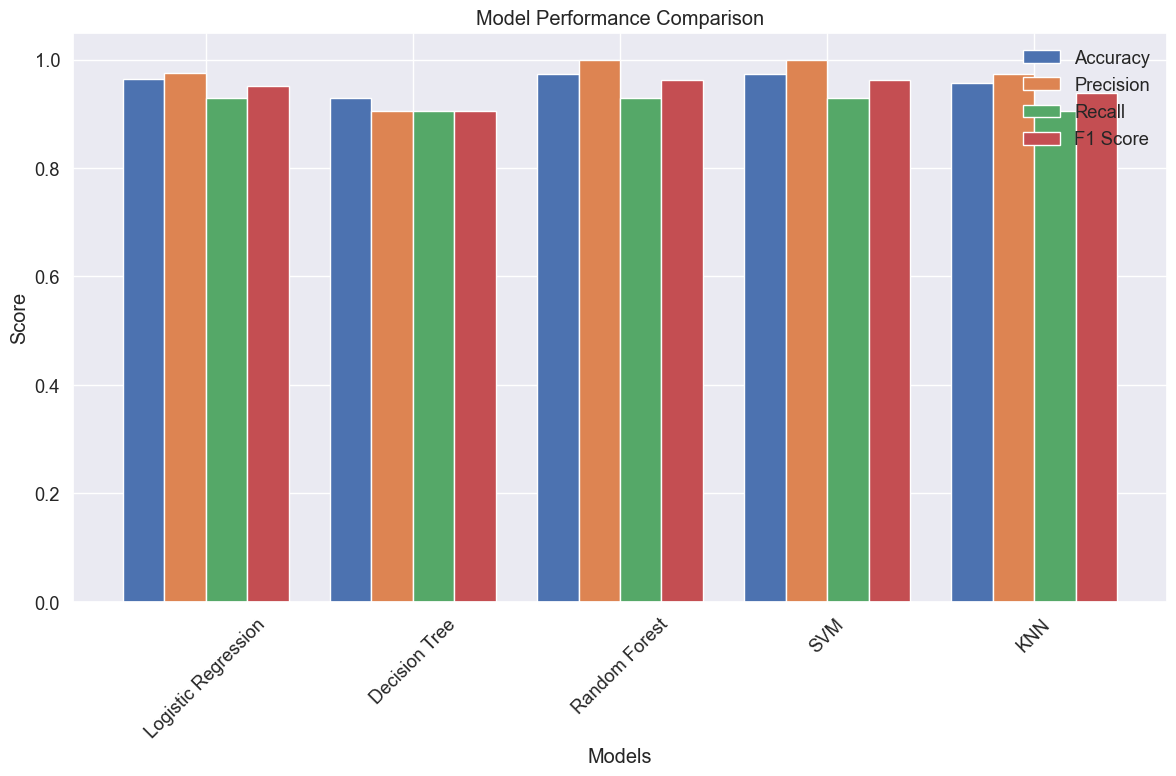

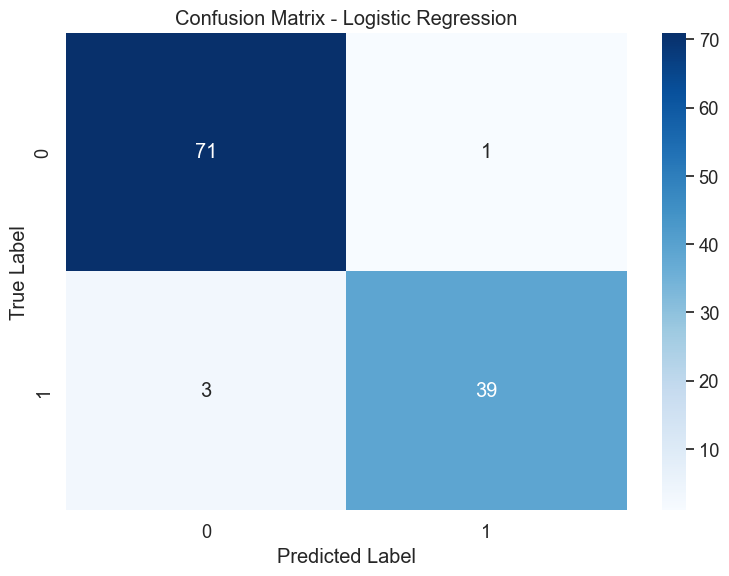

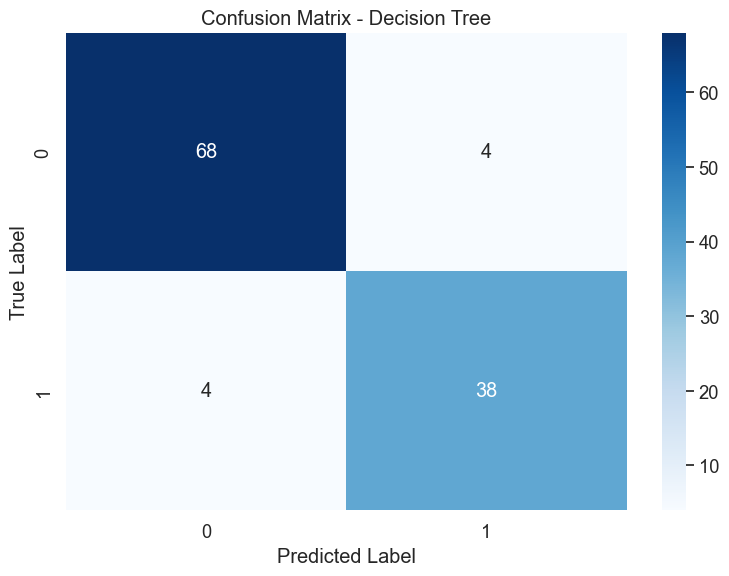

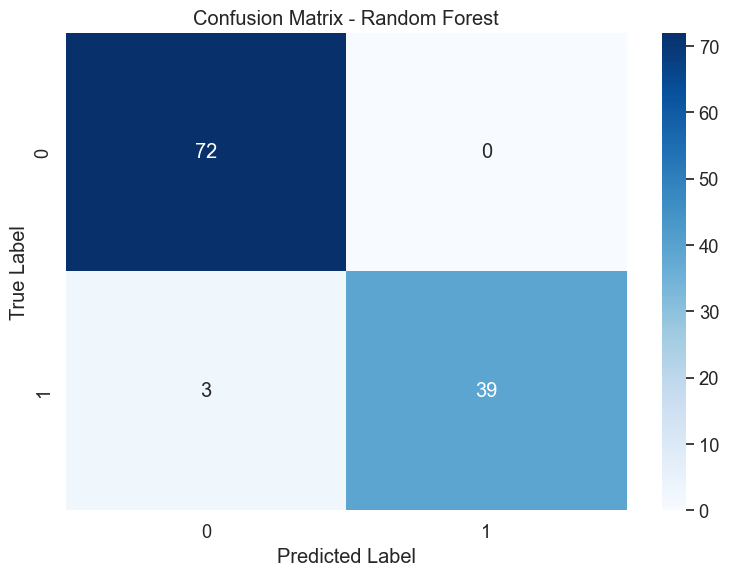

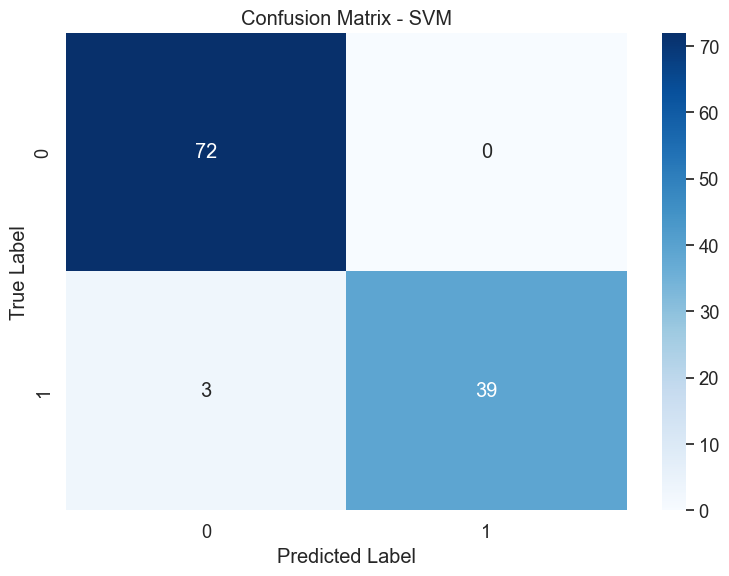

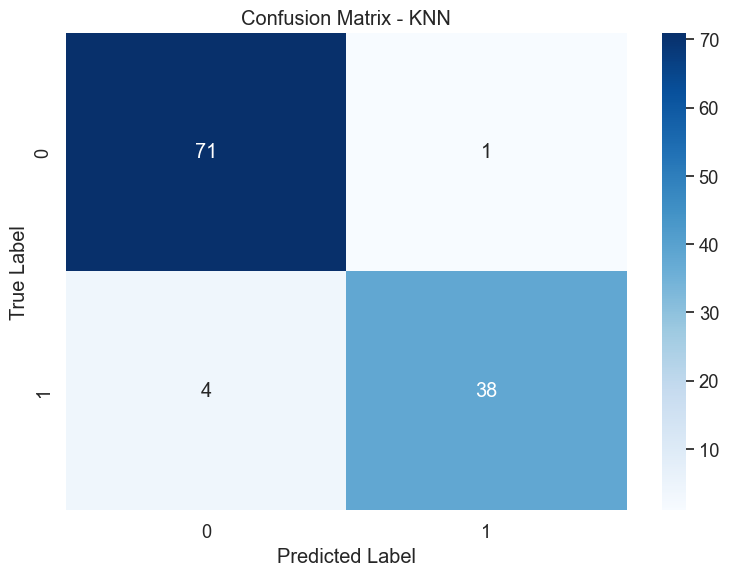

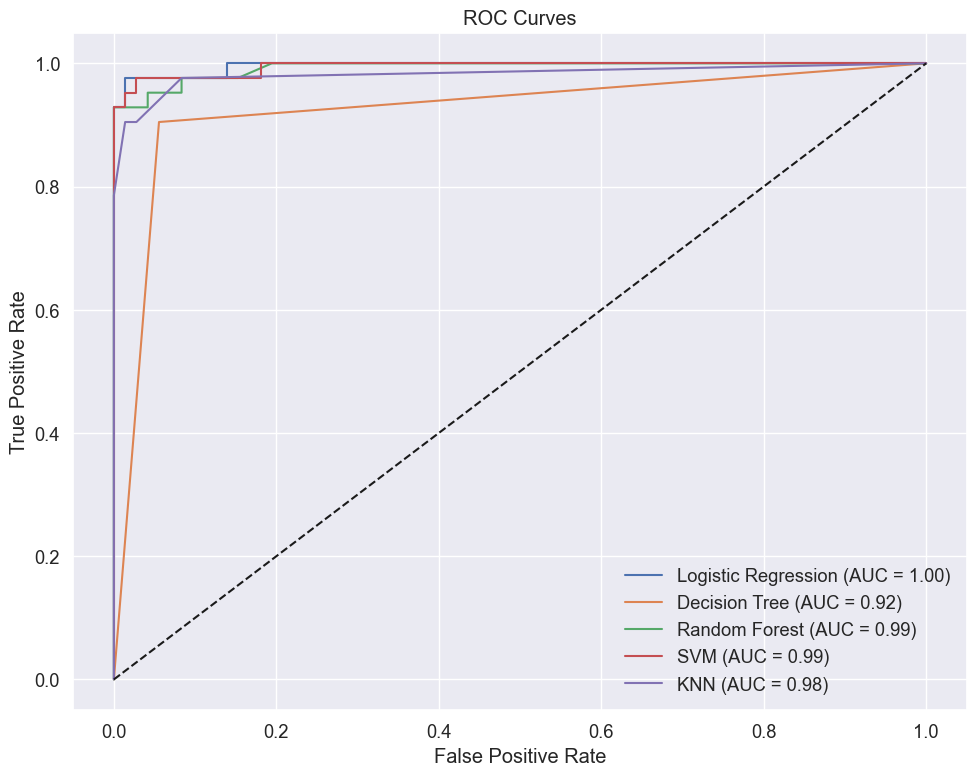

In [10]:
model_results = []
y_probs_dict = {}
for name, model in trained_models.items():
    print(f"\nEvaluating {name} model.")
    results = evaluate_model(model, X_test, y_test, name)
    results['model'] = model
    model_results.append(results)
    
    if hasattr(model, "predict_proba"):
        y_probs_dict[name] = model.predict_proba(X_test)[:, 1]

visualize_results(model_results, X_test, y_test)

if y_probs_dict:
    plot_roc_curves_with_ci(y_test, y_probs_dict)
    
    display(HTML('''
    <div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; margin: 10px 0;">
        <h3>Interactive ROC Curve</h3>
        <p>Click the button below to open the interactive ROC curve visualization in your browser:</p>
        <button onclick="
            var kernel = IPython.notebook.kernel;
            var code = 'webbrowser.open(\"file://\" + os.path.abspath(\"../reports/figures/interactive_roc_curves.html\"))';
            kernel.execute(code);"
            style="background-color: #4CAF50; color: white; padding: 8px 16px; border: none; border-radius: 4px; cursor: pointer;">
            Open Interactive ROC Curve
        </button>
    </div>
    '''))

## Feature Importance


Top 10 important features for Decision Tree:
concave_points_se: 0.7275
fractal_dimension_mean: 0.0790
symmetry_mean: 0.0408
radius_se: 0.0379
concave_points_mean: 0.0225
texture_mean: 0.0225
concavity_worst: 0.0175
concave_points_worst: 0.0156
perimeter_se: 0.0134
compactness_se: 0.0070

Top 10 important features for Random Forest:
concave_points_worst: 0.1514
fractal_dimension_mean: 0.1265
concavity_worst: 0.0935
concave_points_se: 0.0836
perimeter_se: 0.0811
radius_worst: 0.0771
radius_mean: 0.0620
perimeter_mean: 0.0508
texture_mean: 0.0459
symmetry_worst: 0.0300


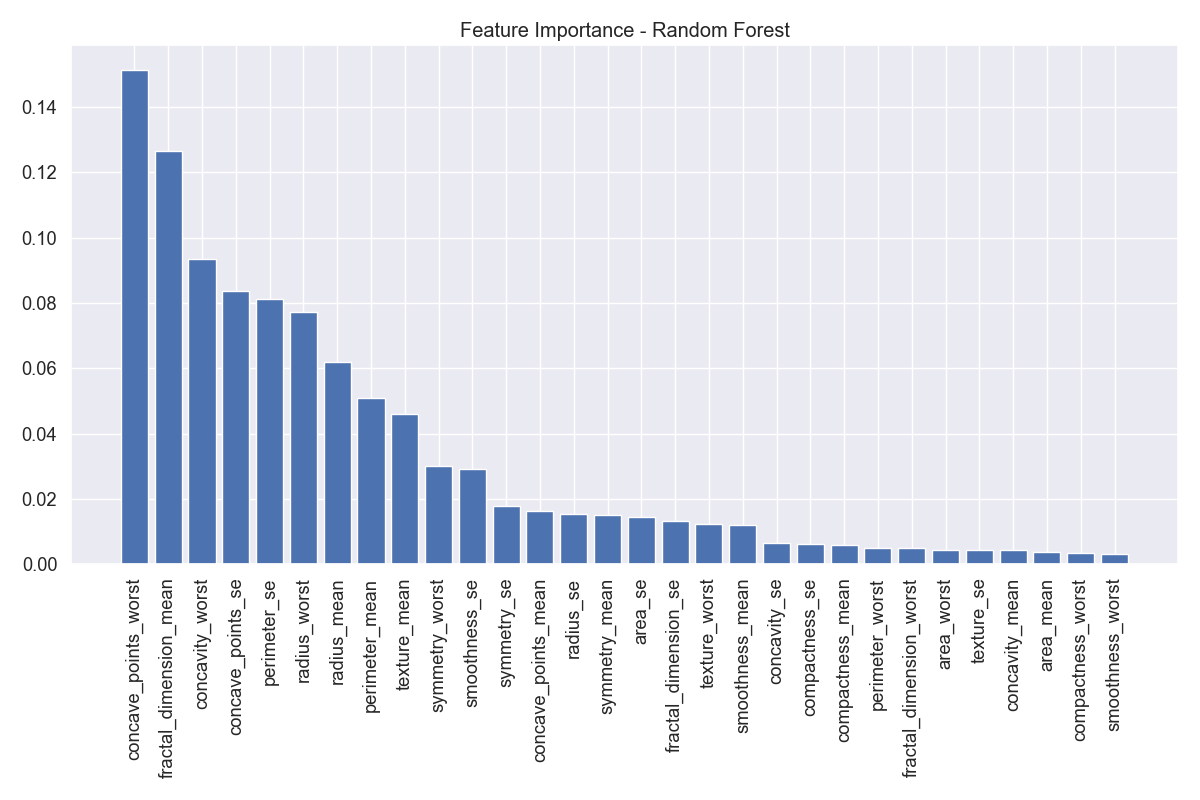

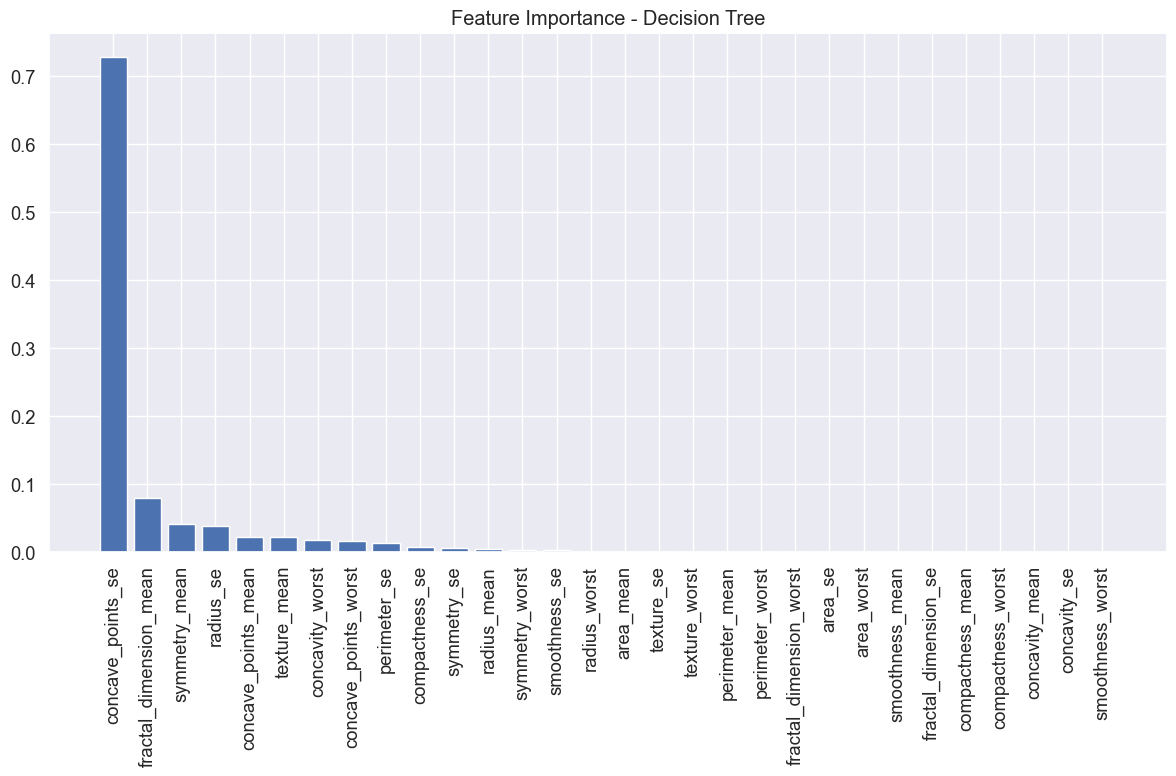

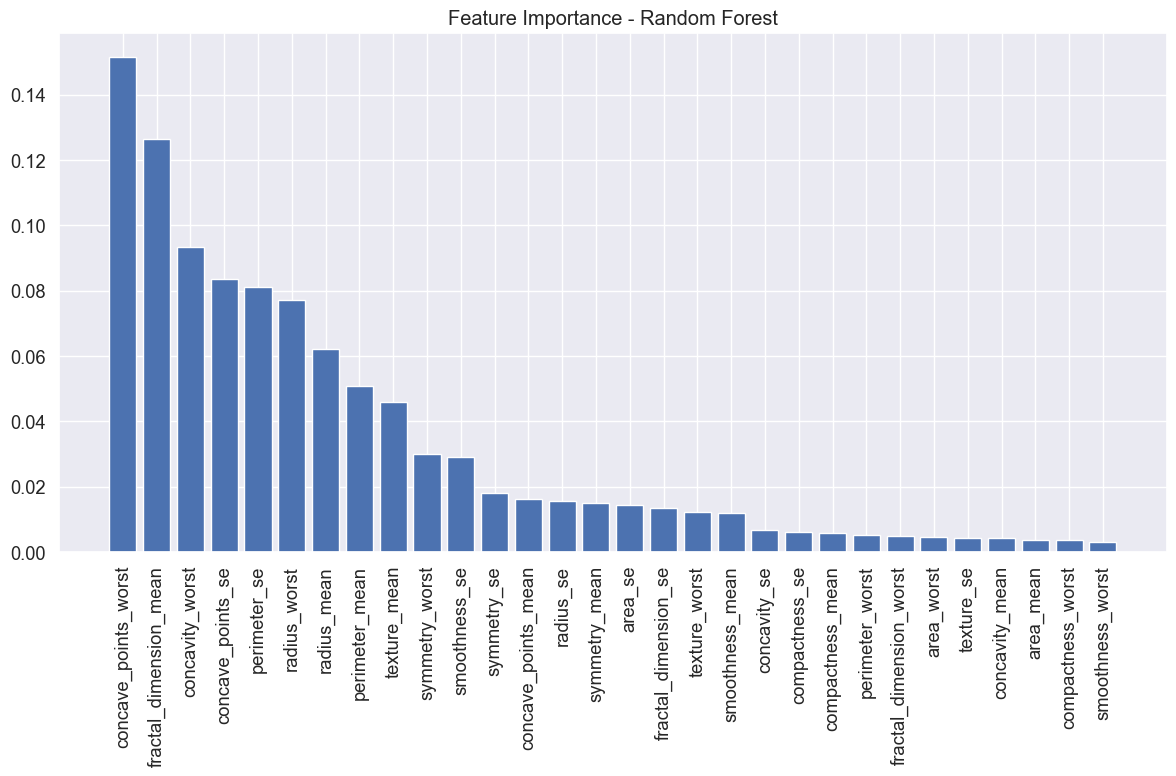

In [11]:
feature_names = df.drop(['id', 'diagnosis'], axis=1).columns.tolist()

feature_importance(model_results, X_train, feature_names)

Image(filename='../reports/figures/feature_importance_Random_Forest.png')

## Final Model Selection

In [12]:
save_best_model(model_results)

Best model (Random Forest) saved to ../models/random_forest.joblib
Model metrics:
  accuracy: 0.9737
  precision: 1.0000
  recall: 0.9286
  f1: 0.9630


## Cross-Validation Analysis
To evaluate model performance more robustly, we'll use k-fold cross-validation with stratification to ensure balanced class distribution across folds. This helps us better understand how our models will generalize to unseen data and whether our performance metrics are stable.

In [13]:
print("Performing cross-validation on models.")

Performing cross-validation on models.


In [14]:
cv_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

cv_results = perform_cross_validation(X, y, cv_models, cv_folds=5, stratified=True)

Performing Stratified 5-fold cross-validation

Cross-validating Logistic Regression.


/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features

Results for Logistic Regression:
  Accuracy:
    Train: 0.9890 ± 0.0020
    Test:  0.9807 ± 0.0102
  Precision:
    Train: 0.9940 ± 0.0038
    Test:  0.9857 ± 0.0190
  Recall:
    Train: 0.9764 ± 0.0037
    Test:  0.9623 ± 0.0113
  F1:
    Train: 0.9851 ± 0.0026
    Test:  0.9738 ± 0.0138

Cross-validating Decision Tree.
Results for Decision Tree:
  Accuracy:
    Train: 1.0000 ± 0.0000
    Test:  0.9209 ± 0.0178
  Precision:
    Train: 1.0000 ± 0.0000
    Test:  0.9017 ± 0.0409
  Recall:
    Train: 1.0000 ± 0.0000
    Test:  0.8869 ± 0.0402
  F1:
    Train: 1.0000 ± 0.0000
    Test:  0.8931 ± 0.0235

Cross-validating Random Forest.
Results for Random Forest:
  Accuracy:
    Train: 1.0000 ± 0.0000
    Test:  0.9595 ± 0.0235
  Precision:
    Train: 1.0000 ± 0.0000
    Test:  0.9580 ± 0.0450
  Recall:
    Train: 1.0000 ± 0.0000
    Test:  0.9341 ± 0.0343
  F1:
    Train: 1.0000 ± 0.0000
    Test:  0.9452 ± 0.0312

Cross-validating SVM.
Results for SVM:
  Accuracy:
    Train: 0.9868 ± 0.00

In [15]:
cv_results

,Model,Accuracy,Accuracy_std,Precision,Precision_std,Recall,Recall_std,F1,F1_std
0,Logistic Regression,0.980686,0.010214,0.985714,0.019048,0.962348,0.011310,0.973836,0.013768
1,Decision Tree,0.920866,0.017825,0.901662,0.040860,0.886932,0.040202,0.893061,0.023525
2,Random Forest,0.959509,0.023507,0.958029,0.045050,0.934109,0.034294,0.945245,0.031247
3,SVM,0.971837,0.014198,0.971285,0.018156,0.952713,0.026187,0.961772,0.019561
4,KNN,0.961279,0.018280,0.979921,0.018156,0.914839,0.041836,0.945797,0.026863


## Cross-Validation Results
The cross-validation results show how consistently each model performs across different data splits. Standard deviation values indicate stability - lower standard deviation means more consistent performance.

In [16]:
display(HTML('''
<div style="display: flex; flex-direction: column; align-items: center;">
    <div style="margin: 20px;">
        <h3>Cross-Validation Splits with Class Distribution</h3>
        <img src="../reports/cross_validation/cv_splits.png" width="900">
    </div>
    <div style="margin: 20px;">
        <h3>Model Performance Comparison (with standard deviation)</h3>
        <img src="../reports/cross_validation/model_comparison.png" width="900">
    </div>
</div>
'''))

## Individual Model Cross-Validation Performance
Let's examine how each model performs across individual cross-validation folds. This gives insight into whether certain folds are particularly challenging for specific models.

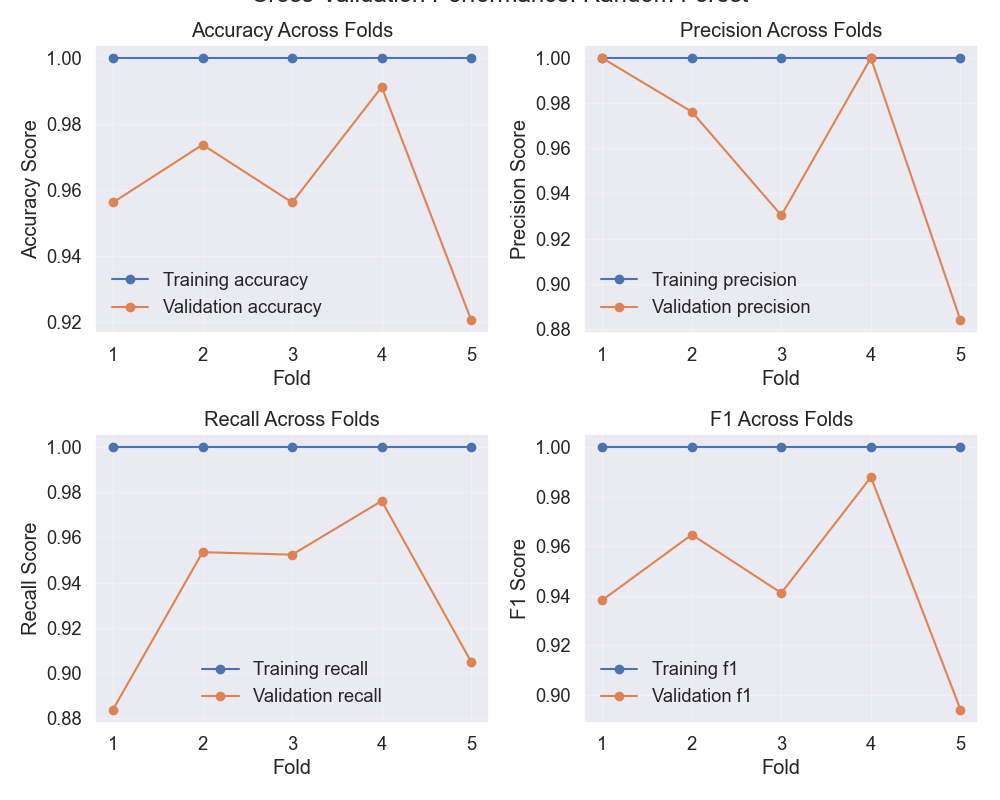

In [17]:
model_name = 'Random Forest'  # Change this to view different models
display(Image(filename=f'../reports/cross_validation/{model_name.replace(" ", "_")}_cv_performance.png'))

## Cross-Validation vs. Train-Test Split Performance
We can now compare our previous train-test split results with our cross-validation results to get a more complete picture of model performance. Significant differences might indicate issues with the specific train-test split we used.

In [18]:
train_test_results = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Train-Test Accuracy': result['accuracy'],
        'Train-Test F1': result['f1']
    } for result in model_results
])

comparison_df = pd.merge(train_test_results, cv_results[['Model', 'Accuracy', 'F1']], on='Model')
comparison_df = comparison_df.rename(columns={'Accuracy': 'CV Accuracy', 'F1': 'CV F1'})

comparison_df['Accuracy Difference'] = comparison_df['Train-Test Accuracy'] - comparison_df['CV Accuracy']
comparison_df['F1 Difference'] = comparison_df['Train-Test F1'] - comparison_df['CV F1']

comparison_df.style.background_gradient(cmap='RdYlGn_r', subset=['Accuracy Difference', 'F1 Difference'])

,Model,Train-Test Accuracy,Train-Test F1,CV Accuracy,CV F1,Accuracy Difference,F1 Difference
0,Logistic Regression,0.964912,0.951220,0.980686,0.973836,-0.015774,-0.022617
1,Decision Tree,0.929825,0.904762,0.920866,0.893061,0.008958,0.011701
2,Random Forest,0.973684,0.962963,0.959509,0.945245,0.014175,0.017718
3,SVM,0.973684,0.962963,0.971837,0.961772,0.001848,0.001191
4,KNN,0.956140,0.938272,0.961279,0.945797,-0.005139,-0.007525


## Ensemble Methods Implementation

Let's implement ensemble methods to see if we can improve performance beyond what the base models achieve.

In [19]:
print("Implementing ensemble methods.")
ensemble_models = implement_ensemble_methods(X_train, y_train, X_test, y_test)

Implementing ensemble methods.
Training base models.
Logistic Regression - Accuracy: 0.9649, F1: 0.9512
Decision Tree - Accuracy: 0.9298, F1: 0.9048
SVM - Accuracy: 0.9737, F1: 0.9630
KNN - Accuracy: 0.9561, F1: 0.9383

Implementing Voting Classifiers.
Voting (Hard) - Accuracy: 0.9561, F1: 0.9367
Voting (Soft) - Accuracy: 0.9737, F1: 0.9630

Implementing Bagging.


/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

invalid value encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

invalid value encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.1

Bagging (Decision Trees) - Accuracy: 0.9649, F1: 0.9500
Random Forest - Accuracy: 0.9737, F1: 0.9630

Implementing Boosting.
AdaBoost - Accuracy: 0.9737, F1: 0.9630
Gradient Boosting - Accuracy: 0.9649, F1: 0.9500

Implementing Stacking.
Stacking - Accuracy: 0.9912, F1: 0.9880


/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

invalid value encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

invalid value encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.1

ROC curves saved to '../reports/ensemble_methods/roc_curves.png'


/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/carlo/miniforge3/envs/py_ai/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by

In [20]:
display(HTML('''
<div style="display: flex; flex-direction: column; align-items: center;">
    <div style="margin: 20px;">
        <h3>Ensemble Methods Comparison</h3>
        <img src="../reports/ensemble_methods/ensemble_comparison.png" width="900">
    </div>
    <div style="margin: 20px;">
        <h3>Performance Metrics Heatmap</h3>
        <img src="../reports/ensemble_methods/metrics_heatmap.png" width="900">
    </div>
    <div style="margin: 20px;">
        <h3>ROC Curves</h3>
        <img src="../reports/ensemble_methods/roc_curves.png" width="900">
    </div>
</div>
'''))

## Ensemble Methods Insights
From the ensemble methods implementation, we can see whether techniques like voting, bagging, boosting, or stacking improve our prediction performance compared to individual models. This analysis helps us select the best approach for our breast cancer prediction task.
 
Some key observations:
1. How voting classifiers compare to their constituent base models
2. Whether bagging improves stability and reduces overfitting
3. If boosting methods successfully focus on difficult-to-classify examples
4. How stacking leverages the strengths of different algorithms